<h1>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Welcome</h1>

<h3> Objective <h3>

Upon initial inspection of the data, we can start thinking of some questions about it that we would want to answer.

- What is the total sales trend?

- Which are the Top 10 products by sales?

- Which are the best Selling Products?

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Import Dataset**

In [20]:
df=pd.read_excel('sales_data.xlsx')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


**Data Audit**

In [21]:
df.shape

(51290, 24)

In [22]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [24]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [25]:
df = df.dropna(subset=['Postal Code'])
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [26]:
df.describe().round()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,9994.0,9994.0,9994.0,9994.0,9994.0,9994.0,9994.0
mean,36294.0,55190.0,230.0,4.0,0.0,29.0,24.0
std,2885.0,32064.0,623.0,2.0,0.0,234.0,59.0
min,31297.0,1040.0,0.0,1.0,0.0,-6600.0,0.0
25%,33795.0,23223.0,17.0,2.0,0.0,2.0,1.0
50%,36294.0,56430.0,54.0,3.0,0.0,9.0,5.0
75%,38792.0,90008.0,210.0,5.0,0.0,29.0,20.0
max,41290.0,99301.0,22638.0,14.0,1.0,8400.0,934.0


**Data Analysis**

**1.Overall Sales**

In [27]:
# Getting month year from order_date
df['month_year'] = df['Order Date'].apply(lambda x: x.strftime('%Y-%m'))

In [28]:
# grouping month_year by sales
df_temp = df.groupby('month_year').sum()['Sales'].reset_index()

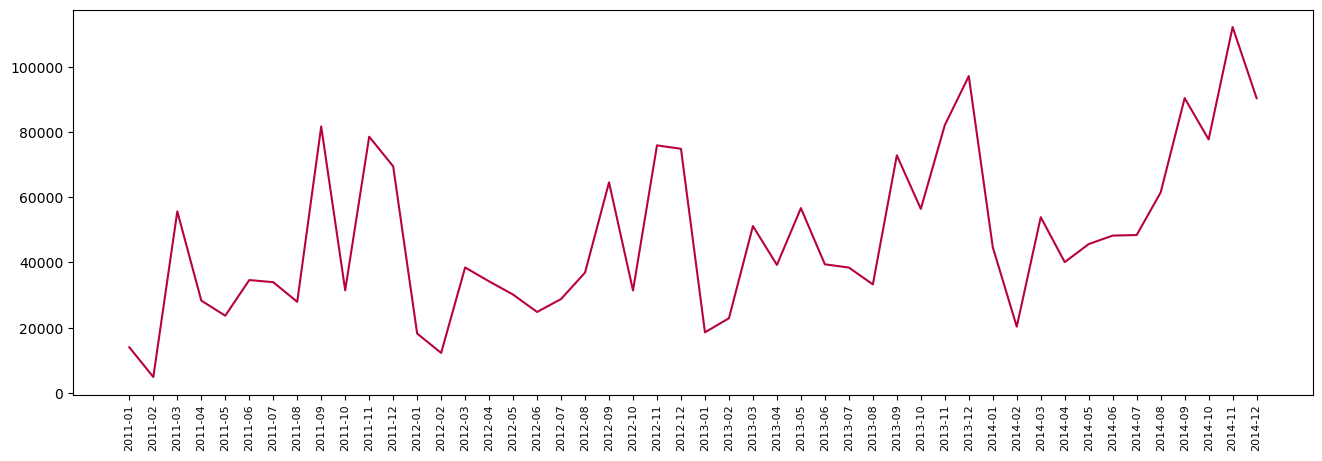

In [29]:
# Setting the figure size
plt.figure(figsize=(16, 5))
plt.plot(df_temp['month_year'], df_temp['Sales'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

**2.Top 10 Products By Sales**

In [30]:
# Grouping products by sales
prod_sales = pd.DataFrame(df.groupby('Product Name').sum()['Sales'])

# Sorting the dataframe in descending order
prod_sales.sort_values(by=['Sales'], inplace=True, ascending=False)

# Top 10 products by sales
prod_sales[:10]

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


**3.Best Selling Products**

In [31]:
# Grouping products by Quantity
best_selling_prods = pd.DataFrame(df.groupby('Product Name').sum()['Quantity'])

# Sorting the dataframe in descending order
best_selling_prods.sort_values(by=['Quantity'], inplace=True, ascending=False)

# Most selling products
best_selling_prods[:10]

,Quantity
Product Name,
Staples,876
KI Adjustable-Height Table,74
Avery Non-Stick Binders,71
Storex Dura Pro Binders,71
GBC Premium Transparent Covers with Diagonal Lined Pattern,67
"Situations Contoured Folding Chairs, 4/Set",64
Chromcraft Round Conference Tables,61
Eldon Wave Desk Accessories,61
Wilson Jones Turn Tabs Binder Tool for Ring Binders,59


**4.Most Prefered Ship mode**

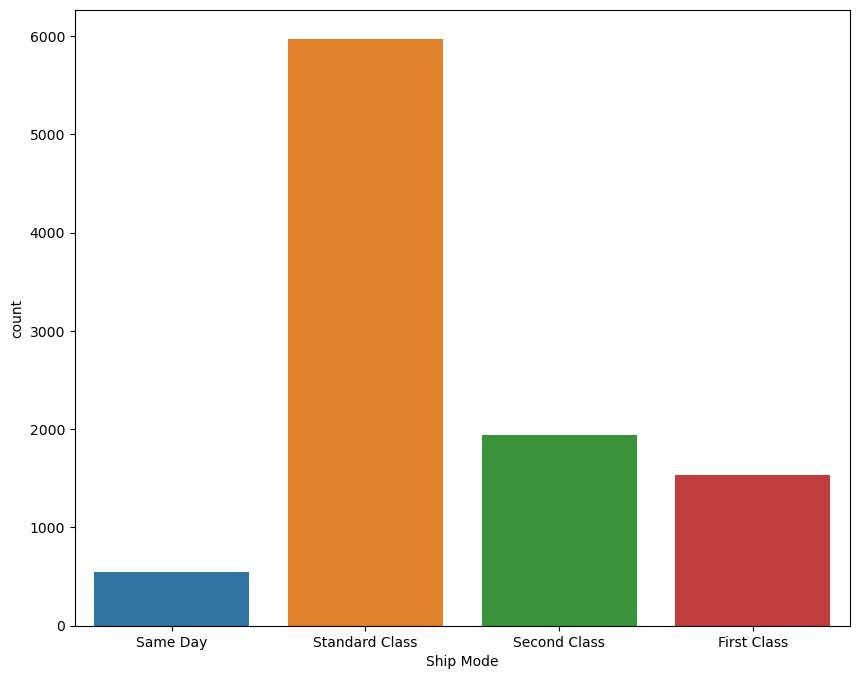

In [32]:
# Setting the figure size
plt.figure(figsize=(10, 8))

# countplot: Show the counts of observations in each categorical bin using bars
sns.countplot(x='Ship Mode', data=df)

# Display the figure
plt.show()

**5.Most Profitable Category and Sub-Category**

In [33]:
# Grouping products by Category and Sub-Category
cat_subcat = pd.DataFrame(df.groupby(['Category', 'Sub-Category']).sum()['Profit'])

# Sorting the values
cat_subcat.sort_values(['Category','Profit'], ascending=False)

Profit
Category        Sub-Category            
Technology      Copiers       55617.8249
                Phones        44515.7306
                Accessories   41936.6357
                Machines       3384.7569
Office Supplies Paper         34053.5693
                Binders       30221.7633
                Storage       21278.8264
                Appliances    18138.0054
                Envelopes      6964.1767
                Art            6527.7870
                Labels         5546.2540
                Fasteners       949.5182
                Supplies      -1189.0995
Furniture       Chairs        26590.1663
                Furnishings   13059.1436
                Bookcases     -3472.5560
                Tables       -17725.4811

<h1>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Thank You!</h1>